In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats

# Binomial Distribution

In [2]:
fair_coin_flips = stats.binom.rvs(n= 10, p = 0.5, size=10000)

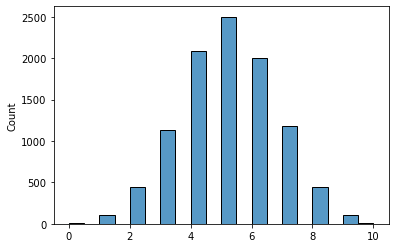

In [3]:
sns.histplot(fair_coin_flips, bins = 20)
plt.show()

In [4]:
biased_coin_flips = stats.binom.rvs(n= 10, p = 0.8, size=10000)

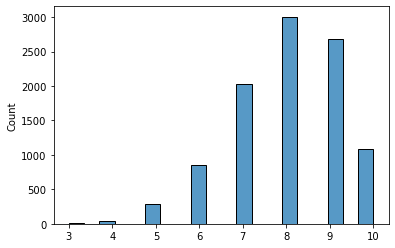

In [5]:
sns.histplot(biased_coin_flips,bins=20, )
plt.show()

In [6]:
stats.binom.pmf(k=5, n=10, p=0.5)

0.24609375000000025

In [7]:
stats.binom.cdf(k=8, n=10, p=0.8)

0.6241903616

# Flights OverBooking Problem

In [9]:
flights = pd.read_csv("Flight.csv")

In [10]:
flights.shape

(1000, 3)

In [14]:
flights.head()

,Passenger_ID,Flight_ID,Arrived
0,1811,A320,1
1,1812,A320,1
2,1813,B777,1
3,1814,B737,1
4,1815,B737,1


In [20]:
showsup_probability = flights['Arrived'].value_counts(normalize=True)[1]
print(showsup_probability)

0.902


In [37]:
PENALTY = 70000

def calculate_expected_penalty(ticket_sold):
    
    total_penality = 0.0
    
    for i in range(1, ticket_sold - 100+1):
        prob = math.comb(ticket_sold, 100+i) * (0.9)**(100+i) * (0.1)**(ticket_sold-100-i)
        penalty = prob*PENALTY*i
        total_penality += penalty
    
    return total_penality

In [38]:
calculate_expected_penalty(108)

19114.182303992442

In [39]:
for i in range(100, 121):
    sales = 5000*i
    penality = calculate_expected_penalty(i)
    profit = sales - penality
    print("overbooking seats {}, Profit made {} ".format(i, round(profit)))

overbooking seats 100, Profit made 500000 
overbooking seats 101, Profit made 504998 
overbooking seats 102, Profit made 509980 
overbooking seats 103, Profit made 514877 
overbooking seats 104, Profit made 519487 
overbooking seats 105, Profit made 523357 
overbooking seats 106, Profit made 525688 
overbooking seats 107, Profit made 525326 
overbooking seats 108, Profit made 520886 
overbooking seats 109, Profit made 510992 
overbooking seats 110, Profit made 494552 
overbooking seats 111, Profit made 470978 
overbooking seats 112, Profit made 440270 
overbooking seats 113, Profit made 402963 
overbooking seats 114, Profit made 359970 
overbooking seats 115, Profit made 312388 
overbooking seats 116, Profit made 261319 
overbooking seats 117, Profit made 207743 
overbooking seats 118, Profit made 152456 
overbooking seats 119, Profit made 96058 
overbooking seats 120, Profit made 38969 


In [40]:
showsup_probability

0.902

In [43]:
distrib = stats.binom.rvs(n=110, p = showsup_probability, size= 1000)

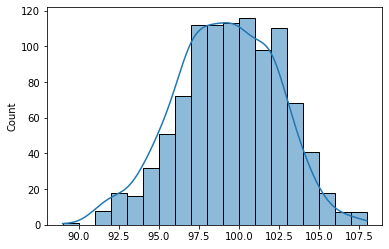

In [45]:
sns.histplot(distrib, kde = True)
plt.show()

# Poisson Distribution

In [51]:
stats.poisson.pmf(k =10, mu = 15)

0.04861075082960534

In [55]:
1- stats.poisson.cdf(k=25, mu = 15)

0.006184903811266795